In [1]:
# for vectorized operations
import numpy as np

# for dataframe manipulation
import pandas as pd

# for vizualizations
import matplotlib.pyplot as plt
import seaborn as sns

# for statistical calculations
import scipy.stats as stats

# for obtaining stock datasets
from pydataset import data

# for manipulation of time data
from datetime import date

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# filter out warnings
import warnings
warnings.filterwarnings('ignore')

# our own functions for accessing our sql database
from env import get_db_url, user, password, host

# our own scripts
import acquire
import prepare

# pandas display preferences
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 3)
#pd.option_context('display.max_rows', None)


#### 4. use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [2]:
df = data('iris')

#### 4a.     print the first 3 rows


In [3]:
df.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


#### 4b.     print the number of rows and columns (shape)


In [4]:
df.shape

(150, 5)

#### 4c.     print the column names


In [5]:
for column in df.columns:
    print(column)

Sepal.Length
Sepal.Width
Petal.Length
Petal.Width
Species


#### 4d. print the data type of each column

In [6]:
df.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

#### 4e.     print the summary statistics for each of the numeric variables


In [7]:
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000,150.000,150.000,150.000
mean,5.843,3.057,3.758,1.199
std,0.828,0.436,1.765,0.762
min,4.300,2.000,1.000,0.100
25%,5.100,2.800,1.600,0.300
50%,5.800,3.000,4.350,1.300
75%,6.400,3.300,5.100,1.800
max,7.900,4.400,6.900,2.500


#### 5. Read the Table1_CustDetails table from your spreadsheet exercises google sheet into a dataframe named df_google_sheets.

In [8]:
url = 'https://docs.google.com/spreadsheets/d/1gb4xDK4WmoM0kBTOiurSNZzz3cQE1IVnRQ59YsUmTmw/export?format=csv#gid=1023018493'
df_google_sheets = pd.read_csv(url)

In [9]:
df_google_sheets.head(3)

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,65.6,593.30,No
1,0003-MKNFE,Male,0,No,No,2,1,0,59.9,542.40,No
2,0004-TLHLJ,Male,0,No,No,1,2,0,73.9,280.85,Yes


#### 5a. assign the first 100 rows to a new dataframe, df_google_sheets_sample

In [10]:
df_google_sheets_sample = df_google_sheets.head(100)

#### 5b. print the number of rows of your original dataframe

In [11]:
df_google_sheets.shape[0]

7049

#### 5c. print the first five column names

In [12]:
for column in df_google_sheets.columns[:5]:
    print(column)

customer_id
gender
is_senior_citizen
partner
dependents


#### 5d. print the column names that have a data type of object

In [13]:
for column in df_google_sheets.dtypes[df_google_sheets.dtypes == 'object'].index:
    print(column)

customer_id
gender
partner
dependents
churn


#### 5e. compute the range for each of the numeric variables

In [14]:
ranges = df_google_sheets.select_dtypes('number')
ranges = ranges.max() - ranges.min()
ranges

is_senior_citizen       1.0
phone_service           2.0
internet_service        2.0
contract_type           2.0
monthly_charges       100.5
total_charges        8666.0
dtype: float64

#### 6. Download your spreadsheet exercises google sheet as an excel file (File → Download → Microsoft Excel). Read the Table1_CustDetails worksheet into a dataframe named df_excel.

In [15]:
df_excel = pd.read_excel('df_excel.xlsx', sheet_name='Table1_CustDetails')
df_excel.head(3)

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0.0,Yes,Yes,1.0,1.0,1.0,65.6,593.30,No
1,0003-MKNFE,Male,0.0,No,No,2.0,1.0,0.0,59.9,542.40,No
2,0004-TLHLJ,Male,0.0,No,No,1.0,2.0,0.0,73.9,280.85,Yes


#### 6a. assign the first 100 rows to a new dataframe, df_excel_sample

In [16]:
df_excel_sample = df_excel.head(100)

#### 6b. print the number of rows of your original dataframe

In [17]:
df_excel.shape[0]

7049

#### 6c. print the first 5 column names

In [18]:
for column in df_excel.columns[:5]:
    print(column)

customer_id
gender
is_senior_citizen
partner
dependents


#### 6d. print the column names that have a data type of object

In [19]:
for column in df_google_sheets.select_dtypes(include=[object]).columns:
    print(column)

customer_id
gender
partner
dependents
churn


#### 6e. compute the range for each of the numeric variables.

In [20]:
ranges = df_google_sheets.select_dtypes(exclude=[object])
ranges = ranges.max() - ranges.min()
ranges

is_senior_citizen       1.0
phone_service           2.0
internet_service        2.0
contract_type           2.0
monthly_charges       100.5
total_charges        8666.0
dtype: float64

#### 7. read the data from the given google sheet into a dataframe, df_google

In [21]:
sheet_id = '1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g'
sheet_name = 'train'

url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

df_google = pd.read_csv(url)

#### 7a. Print the first 3 rows

In [22]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,NaN,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,NaN,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,NaN,7.925,NaN,S


#### 7b. print the number of rows and columns 

In [23]:
df_google.shape

(891, 12)

#### 7c. print the column names

In [24]:
for column in df_google.columns:
    print(column)

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


#### 7d. print the data type of each column

In [25]:
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket         float64
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### 7e. print the summary statistics for each of the numeric variables

In [26]:
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare
count,891.000,891.000,891.000,714.000,891.000,891.000,6.610e+02,891.000
mean,446.000,0.384,2.309,29.699,0.523,0.382,2.603e+05,32.204
std,257.354,0.487,0.836,14.526,1.103,0.806,4.716e+05,49.693
min,1.000,0.000,1.000,0.420,0.000,0.000,6.930e+02,0.000
25%,223.500,0.000,2.000,20.125,0.000,0.000,2.000e+04,7.910
50%,446.000,0.000,3.000,28.000,0.000,0.000,2.362e+05,14.454
75%,668.500,1.000,3.000,38.000,1.000,0.000,3.477e+05,31.000
max,891.000,1.000,3.000,80.000,8.000,6.000,3.101e+06,512.329


#### 7f. Print the unique values for each of your categorical variables

In [27]:
categorical_columns = list(df_google.nunique()[df_google.nunique() < 10].index)
for i in range(df_google[categorical_columns].shape[1]):
    print(f'{df_google[categorical_columns].iloc[:, i].name}: {(df_google[categorical_columns].iloc[:, i].unique())}')

Survived: [0 1]
Pclass: [3 1 2]
Sex: ['male' 'female']
SibSp: [1 0 3 4 2 5 8]
Parch: [0 1 2 5 3 4 6]
Embarked: ['S' 'C' 'Q' nan]


In [28]:
#simpler way:
categorical_df = df_google.loc[:,df_google.nunique()<10]
for col in categorical_df.columns:
    print(f'{col}: {(categorical_df[col].unique())}')

Survived: [0 1]
Pclass: [3 1 2]
Sex: ['male' 'female']
SibSp: [1 0 3 4 2 5 8]
Parch: [0 1 2 5 3 4 6]
Embarked: ['S' 'C' 'Q' nan]


### 1. Make a function named get_titanic_data that returns the titanic data from the codeup data science database as a pandas data frame. Obtain your data from the Codeup Data Science Database. 

In [29]:
import os
from env import get_db_url, user, password, host

def get_titanic_data():
    
    filename = 'titanic.csv'
    
    if os.path.exists(filename):
        print('Reading from local CSV...')
        return pd.read_csv(filename)
    
    url = get_db_url('titanic_db')
    sql = '''
    SELECT * FROM passengers
    '''
    
    print('No local file exists\nReading from SQL database...')
    df = pd.read_sql(sql, url)

    print('Saving to local CSV... ')
    df.to_csv(filename, index=False)
    
    return df

### 2. Make a function named get_iris_data that returns the data from the iris_db on the codeup data science database as a pandas data frame. The returned data frame should include the actual name of the species in addition to the species_ids. Obtain your data from the Codeup Data Science Database.


In [30]:
def get_iris_data():
    
    filename = 'iris.csv'
    
    if os.path.exists(filename):
        print('Reading from local CSV...')
        return pd.read_csv(filename)
        
    url = get_db_url('iris_db')
    sql = '''
    SELECT *
      FROM species
      JOIN measurements USING(species_id);
    '''
    
    print('No local file exists\nReading from SQL database...')
    df = pd.read_sql(sql, url)
    
    print('Saving to local CSV...')
    df.to_csv(filename, index=False)
    
    return df

### 3. Make a function named get_telco_data that returns the data from the telco_churn database in SQL. In your SQL, be sure to join all 4 tables together, so that the resulting dataframe contains all the contract, payment, and internet service options. Obtain your data from the Codeup Data Science Database. 

In [31]:
def get_telco_data():
    
    filename = 'telco_chun.csv'
    
    if os.path.exists(filename):
        print('Reading from local CSV...')
        return pd.read_csv(filename)
    
    url = get_db_url('telco_churn')
    sql = '''
    SELECT * 
      FROM customers
        JOIN contract_types USING(contract_type_id)
        JOIN internet_service_types USING(internet_service_type_id)
        JOIN payment_types USING(payment_type_id)
    '''
    
    print('No local file exists\nReading from SQL database...')
    df = pd.read_sql(sql, url)
    
    print('Saving to local CSV...')
    df.to_csv(filename, index=False)
    
    return df

### 4. Once you've got your get_titanic_data, get_iris_data, and get_telco_data functions written, now it's time to add caching to them. To do this, edit the beginning of the function to check for the local filename of telco.csv, titanic.csv, or iris.csv. If they exist, use the .csv file. If the file doesn't exist, then produce the SQL and pandas necessary to create a dataframe, then write the dataframe to a .csv file with the appropriate name. 

# Data Preparation

In [32]:
import acquire

### Using the Iris Data: 

#### 1. Use the function defined in acquire.py to load the iris data.


In [33]:
df = acquire.get_iris_data()

Reading from local CSV...


#### 2. Drop the species_id and measurement_id columns

In [34]:
df = df.drop(columns=['species_id', 'measurement_id'])

#### 3. Rename the species_name column to just species.


In [35]:
df = df.rename(columns={'species_name': 'species'})

#### 4. Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).


In [36]:
dummy_df = pd.get_dummies(df['species'], drop_first=True)
df = pd.concat([df, dummy_df], axis=1)

#### 5. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.


In [37]:
def prep_iris(df):
    df = df.drop(columns=['species_id', 'measurement_id'])
    df = df.rename(columns={'species_name': 'species'})
    dummy_df = pd.get_dummies(df['species'], drop_first=True)
    df = pd.concat([df, dummy_df], axis=1)    
    return df

### Using the Titanic dataset

#### 1. Use the function defined in acquire.py to load the Titanic data.


In [38]:
df = acquire.get_titanic_data()

Reading from local CSV...


In [39]:
df.head(3)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.250,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.283,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.925,S,Third,NaN,Southampton,1


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [41]:
df.alone.value_counts()

1    537
0    354
Name: alone, dtype: int64

In [42]:
df.alone[(df.parch == 0) & (df.sibsp == 0)].value_counts()

1    537
Name: alone, dtype: int64

In [43]:
df.alone[(df.parch > 0) | (df.sibsp > 0)].value_counts()

0    354
Name: alone, dtype: int64

#### 2. Drop any unnecessary, unhelpful, or duplicated columns

In [44]:
# drop duplicate rows, if they exist:
df = df.drop_duplicates()

In [45]:
# dropping columns

# class gives the same info as pclass
# embarked gives the same info as embarked_town
# deck has too many missing values
# age has too many missing values
# alone gives duplicate info for the combination of parch and sibsp (see above)
# passenger_id is simply an index

df = df.drop(columns=['class', 'embarked', 'deck', 'age', 'alone', 'passenger_id'])

#### 3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [46]:
df.head()

,survived,pclass,sex,sibsp,parch,fare,embark_town
0,0,3,male,1,0,7.250,Southampton
1,1,1,female,1,0,71.283,Cherbourg
2,1,3,female,0,0,7.925,Southampton
3,1,1,female,1,0,53.100,Southampton
4,0,3,male,0,0,8.050,Southampton


In [47]:
categorical_columns = ['sex', 'embark_town']

for col in categorical_columns:
    dummy_df = pd.get_dummies(df[col],
                              prefix=df[col].name,
                              drop_first=True,
                              dummy_na=False)
    df = pd.concat([df, dummy_df], axis=1)
    # drop original column
    df = df.drop(columns=col)

#### 4. Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [48]:
def prep_titanic(df):

    # drop duplicate rows, if they exist:
    df = df.drop_duplicates()

    # drop unnecessary columns
    df = df.drop(columns=['class', 'embarked', 'deck', 'age', 'alone', 'passenger_id'])

    # encode categorical columbns with dummy variables then drop the original columns
    categorical_columns = ['sex', 'embark_town']
    for col in categorical_columns:
        dummy_df = pd.get_dummies(df[col],
                                  prefix=df[col].name,
                                  drop_first=True,
                                  dummy_na=False)
        df = pd.concat([df, dummy_df], axis=1)
        df = df.drop(columns=col)
        
    return df

### Using the Telco dataset

#### 1. Use the function defined in acquire.py to load the Telco data.


In [49]:
df = acquire.get_telco_data()

Reading from local CSV...


In [50]:
df.head(3)

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [52]:
df.shape

(7043, 24)

In [53]:
# drop duplicate rows, if present
df = df.drop_duplicates()

In [54]:
# clean up total_charges column and cast as float
df['total_charges'] = df.total_charges.replace(' ', np.nan).astype(float)

In [55]:
# removing brand new customers
df = df[df.tenure != 0]

#### 2. Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.


In [56]:
# type_id columns are simply foreign key columns that have corresponding string values
# customer_id is a primary key that is not useful for our analysis
df = df.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id'])

#### 3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.


In [57]:
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
categorical_columns

['gender',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type']

In [58]:
for col in categorical_columns:
    dummy_df = pd.get_dummies(df[col],
                              prefix=df[col].name,
                              drop_first=True,
                              dummy_na=False)
    df = pd.concat([df, dummy_df], axis=1)
    df = df.drop(columns=col)

In [59]:
df.dtypes

senior_citizen                             int64
tenure                                     int64
monthly_charges                          float64
total_charges                            float64
gender_Male                                uint8
partner_Yes                                uint8
dependents_Yes                             uint8
phone_service_Yes                          uint8
multiple_lines_No phone service            uint8
multiple_lines_Yes                         uint8
online_security_No internet service        uint8
online_security_Yes                        uint8
online_backup_No internet service          uint8
online_backup_Yes                          uint8
device_protection_No internet service      uint8
device_protection_Yes                      uint8
tech_support_No internet service           uint8
tech_support_Yes                           uint8
streaming_tv_No internet service           uint8
streaming_tv_Yes                           uint8
streaming_movies_No 

#### 4. Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [60]:
def prep_telco(df):
    
    # drop duplicate rows, if present
    
    df = df.drop_duplicates()
    
    # clean up total charges column and cast as float
    df['total_charges'] = df.total_charges.replace(' ', np.nan).astype(float)
    
    # removing brand new customers
    df = df[df.tenure != 0]
    
    # drop columns:
    
    # *_type_id columns are simply foreign key columns that have corresponding string values
    # customer_id is a primary key that is not useful for our analysis
    df = df.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id'])
    
    # encode categorical columns with dummy variables
    
    categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
    
    for col in categorical_columns:
        dummy_df = pd.get_dummies(df[col],
                                  prefix=df[col].name,
                                  drop_first=True,
                                  dummy_na=False)
        df = pd.concat([df, dummy_df], axis=1)
        df = df.drop(columns=col)
        
    return df

# Exploratory Analysis

## Section 1 - Iris Data

### 1. Acquire, Prepare and Split your data

#### Acquire:

In [61]:
iris = acquire.get_iris_data()

Reading from local CSV...


#### Prepare:

In [62]:
iris = prepare.prep_iris(iris)

#### Split:

In [63]:
train, test = train_test_split(iris, test_size=.2, random_state=123, stratify=iris.species)

In [64]:
train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.species)

In [65]:
train.shape

(84, 7)

In [66]:
test.shape

(30, 7)

In [67]:
validate.shape

(36, 7)

In [68]:
train.head(3)

,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
79,versicolor,5.7,2.6,3.5,1.0,1,0
36,setosa,5.5,3.5,1.3,0.2,0,0
133,virginica,6.3,2.8,5.1,1.5,0,1


In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 79 to 73
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   species       84 non-null     object 
 1   sepal_length  84 non-null     float64
 2   sepal_width   84 non-null     float64
 3   petal_length  84 non-null     float64
 4   petal_width   84 non-null     float64
 5   versicolor    84 non-null     uint8  
 6   virginica     84 non-null     uint8  
dtypes: float64(4), object(1), uint8(2)
memory usage: 4.1+ KB


### 2. Univariate Stats

#### For each measurement type (quantitative variable): create a histogram, boxplot, and compute descriptive statistics (using.describe())

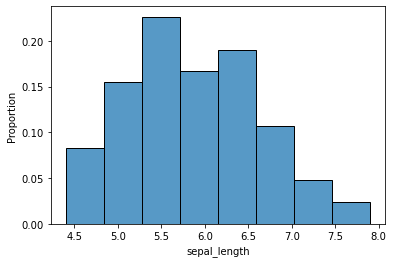

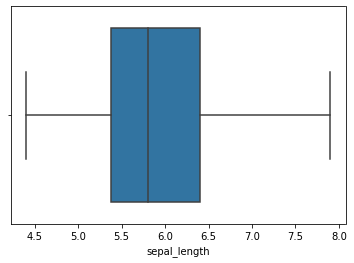

       sepal_length
count        84.000
mean          5.870
std           0.769
min           4.400
25%           5.375
50%           5.800
75%           6.400
max           7.900


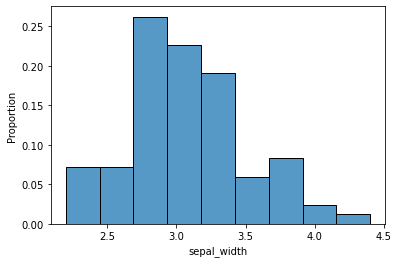

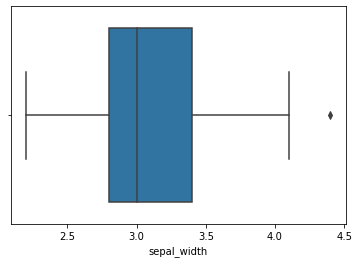

       sepal_width
count       84.000
mean         3.075
std          0.448
min          2.200
25%          2.800
50%          3.000
75%          3.400
max          4.400


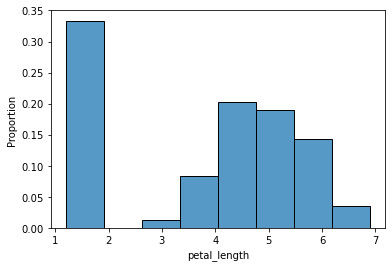

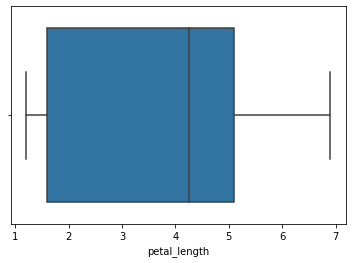

       petal_length
count        84.000
mean          3.771
std           1.735
min           1.200
25%           1.600
50%           4.250
75%           5.100
max           6.900


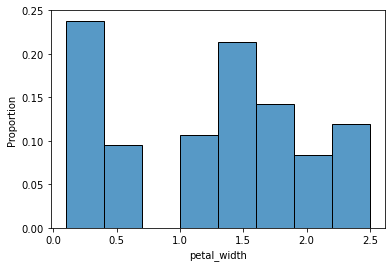

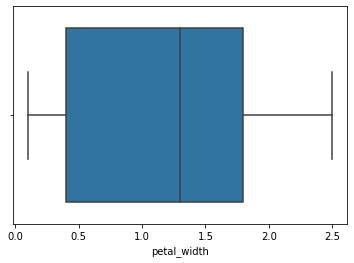

       petal_width
count       84.000
mean         1.204
std          0.753
min          0.100
25%          0.400
50%          1.300
75%          1.800
max          2.500


In [70]:
quantitative_columns = [col for col in train.columns if train[col].dtype == 'float64']

for col in quantitative_columns:
    
        sns.histplot(train[col], stat='proportion')
        plt.show()
        
        sns.boxplot(train[col])
        plt.show()
        
        print(pd.DataFrame(train[col].describe()))

#### For each species (categorical variable): create a frequency table and a bar plot of those frequencies.


In [71]:
categorical_columns = ['species']

            species_counts
versicolor              28
setosa                  28
virginica               28


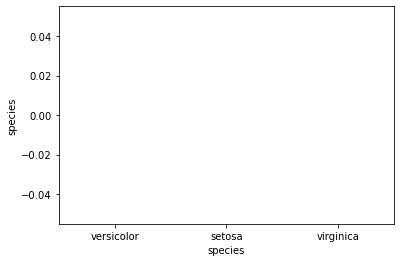

In [72]:
print(pd.DataFrame(train.species.value_counts())
      .rename(columns={'species':'species_counts'}))

sns.barplot(x='species', 
            y=train.species.value_counts(), 
            data=train)
plt.show()